**ВИЗУАЛИЗАЦИЯ ФАЙЛОВ**

Цели данного модуля:

Познакомиться с различными способами графического представления данных.

Освоить основные методы визуализации библиотек Matplotlib и Pandas.

Научиться настраивать диаграммы в Matplotlib для повышения их информативности.

Освоить основные методы визуализации библиотеки Seaborn.

Освоить базовые методы интерактивной визуализации и анимации библиотеки Plotly.

Научиться выбирать правильные методы визуализации для конкретных задач.

*Система координат* — это способ определения положения точки в пространстве или на плоскости. Самая простая система координат — двумерная прямоугольная, или декартова, система координат, с которой вы знакомы из уроков математики в школе. Каждой точке в этой системе соответствуют два значения: значение по оси абсцисс и значение по оси ординат.

*Ось абсцисс* — горизонтальная ось в прямоугольной системе координат. Традиционно её называют осью X.

*Ось ординат* — вертикальная ось в прямоугольной системе координат. Традиционно её называют осью Y.

ОСНОВНЫЕ ТИПЫ ВИЗУАЛИЗАЦИИ:

линейный график;
гистограмма;
диаграмма рассеяния;
коробчатая диаграмма;
круговая диаграмма;
столбчатая диаграмма;
тепловая карта.

In [88]:
##описание находится в C:\Users\peakt\Desktop\IDI\DS_2_5_Types_of_visualization.ipynb

***Знакомимся с новыми данными: коронавирус***

In [89]:
import pandas as pd
covid_data =  pd.read_csv('covid_data.csv')

display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


date — дата наблюдения;

province/state — наименование провинции/штата;

country — наименование страны;

confirmed — общее число зафиксированных случаев на указанный день;

deaths — общее число зафиксированных смертей на указанный день;

recovered — общее число выздоровлений на указанный день.

In [90]:
vaccinations_data = pd.read_csv('country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]




country — наименование страны;

date — дата наблюдения;

total_vaccinations — общее число введённых вакцин в стране на указанный день;

people_vaccinated — общее число привитых первым компонентом в стране на указанный день;

people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );

daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);

vaccines — комбинации вакцин, используемые в стране.

Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.

**ПРЕДОБРАБОТКА ДАННЫХ**

для того чтобы корретно обьединить таблицы надо их  перед этим предобработать 

группируем таблицу по дате и названию страны , рассчитываем сумм показатели по всем регионам . таким образом переходим от данных регионов к данным стран 

In [91]:
covid_data=  covid_data.groupby(
    ['date' , 'country'],
    as_index=False
)[['confirmed','deaths', 'recovered']].sum()

In [92]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [93]:
covid_data['active'] =  covid_data['confirmed']- covid_data['deaths']- covid_data['recovered']

In [94]:
covid_data= covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed']= covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] =  covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] =  covid_data.groupby('country')['recovered'].diff()

In [95]:
covid_data.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
vaccinations_data['date'] =  pd.to_datetime(vaccinations_data['date'])

In [97]:
starts = vaccinations_data['date'].max()
print(starts)

2021-09-06 00:00:00


In [98]:
covid_df = covid_data.merge(
    vaccinations_data, 
    on = ['country','date' ],
    how='left'
)
display(covid_df.head(10))

covid_df.shape

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-29,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-02,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-03,Afghanistan,2.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-04,Afghanistan,4.0,0.0,0.0,4.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(86785, 16)

In [99]:
result = covid_df[covid_df['country'] == 'United States']


In [100]:
covid_df['death_rate'] =  (covid_df['deaths'] / covid_df['confirmed'])*100
covid_df['recoved_rate'] = (covid_df['recovered'] / covid_df['confirmed'])*100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max() ,2)

np.float64(7.19)

In [101]:
round(covid_df[covid_df['country']== 'Russia']['recoved_rate'].mean() , 2)

np.float64(67.06)

**ГРАФИЧЕСКИЕ ВОЗМОЖНОСТИ ПАНДАС**

In [102]:
covid_df['date'] = pd.to_datetime(covid_data['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recoved_rate
0,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Основным методом для создания простейших графиков в Pandas является метод plot(). Разберем его основные параметры:
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет

<Axes: title={'center': 'Ежедневная заболеваемость по всем странам'}, xlabel='date'>

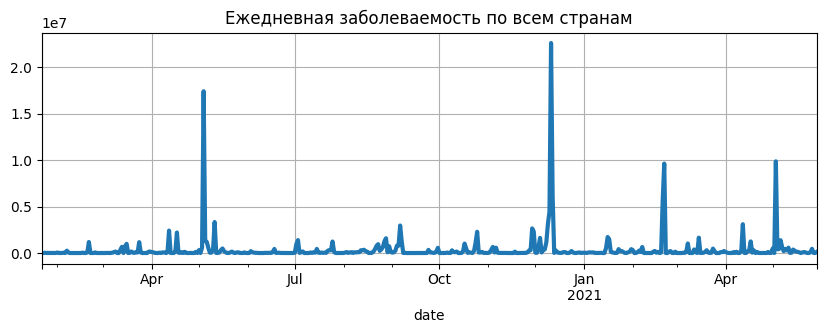

In [125]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(10, 3),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
)

**Выводы по графику:** на графике отчетливо виден умеренный начальный рост заболеваемости, после чего наблюдается ее резкое повышение в середине октября 2020, а в декабре 2020 года вспышка коронавируса (зафиксировано более 1.4 млн заболевших в день). После чего наблюдается постепенное уменьшение числа ежедневно фиксированных случаев и наступление второй волны в марте 2021. Наконец, начиная с мая 2021 наблюдается очередной спад.

Пилообразность графика - подъемы и спады с периодом в 7 дней - могут быть связаны с рабочими и выходными днями.
Нам неизвестно, как  устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что спад в выходные обусловлен меньшей интенсивностью работы медицинских служб. Также можно предположить, что в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берется/проводится меньше тестов, к понедельнику они еще не готовы и диагноз еще не поставлен. Также можем предположить, что минимум в понедельник может быть запаздыванием подсчета статистики, т.е. на самом деле данные за понедельник - это данные за воскресенье

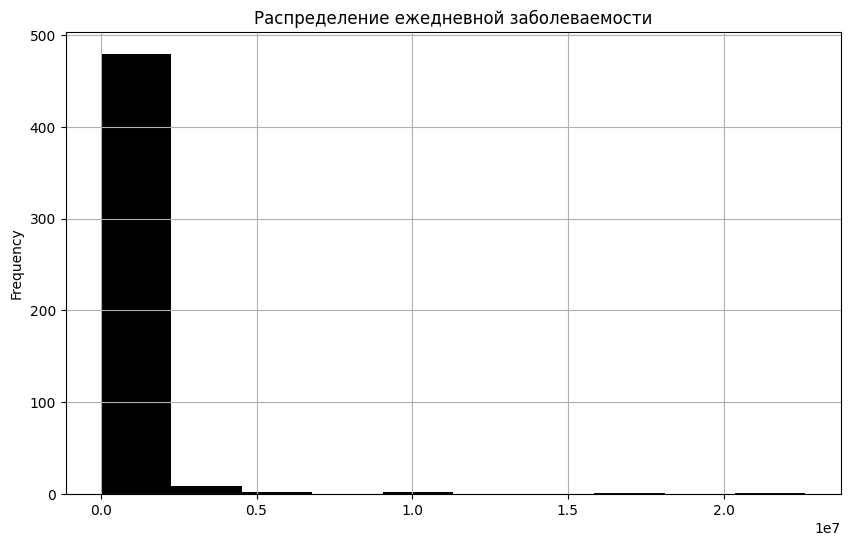

In [121]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

In [122]:
import numpy as np
first_line = [x*y for x in range(2, 100, 6) for y in range (7, 1, -2)]
second_line = [x ** 0.5 for x in range(1000, 1101, 2)]
third_line = [x**2 for x in range(51)]

big_secret = np.array([first_line, second_line, third_line, second_line, first_line])
big_secret[::2, ::2] = 1
big_secret[1::2, 1::2] = -1
big_secret[1][1]

np.float64(-1.0)

**Выводы по графику:** по гистограмме можно судить о частоте попадания ежедневной заболеваемости в определенный интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн. человек), разбитый на 10 равных интервалов. На оси ординат - число наблюдений, попавших в этот интервал.

Во-первых, мы видим модальное значение близ нуля (от 0 до примерно 150 тыс. заболеваний в день), т.е. большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

Во-вторых, в глаза бросается "пенёк", который соответствует резкой вспышке заболеваемости, которую мы видели ранее, его высота очень мала, ведь такое наблюдение единственно. Даже на гистограмме кажется, что данное наблюдение является аномальным и скорее всего является выбросом.

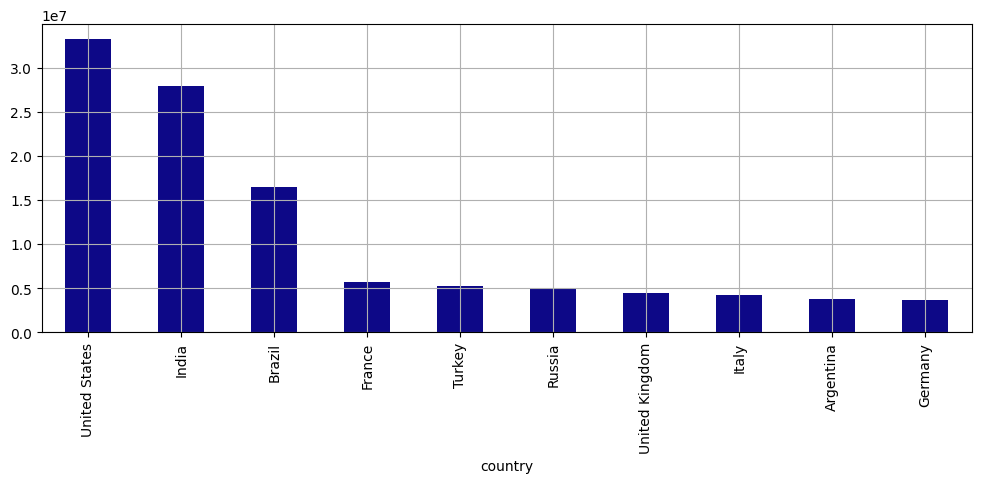

In [123]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

**Выводы по графику:** на диаграмме видно, что лидерами по числу заболевших являются Соединенные Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаково.

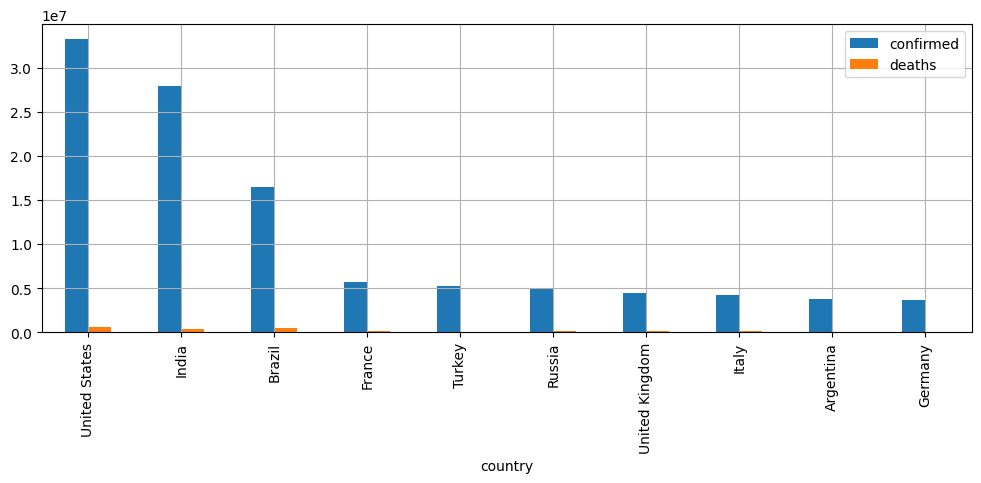

In [124]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True
);

**Выводы по графику:** график является небольшим усовершенствованием предыдущего. Теперь на графике можно увидеть соотношение числа зафиксированных случаев и смертей. 
Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это косвенно может говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие- по клинической картине, учитывающей и другие показатели). Это с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идален).

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить "здесь и сейчас", не сильно заморачиваясь над их внешним видом. Однако, такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации - довольно ограниченный функционал:
* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации он не подходит
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах
* Сложно или иногда даже невозможно корректировать внешний вид графика 
* Отсутствует 3D визуализация


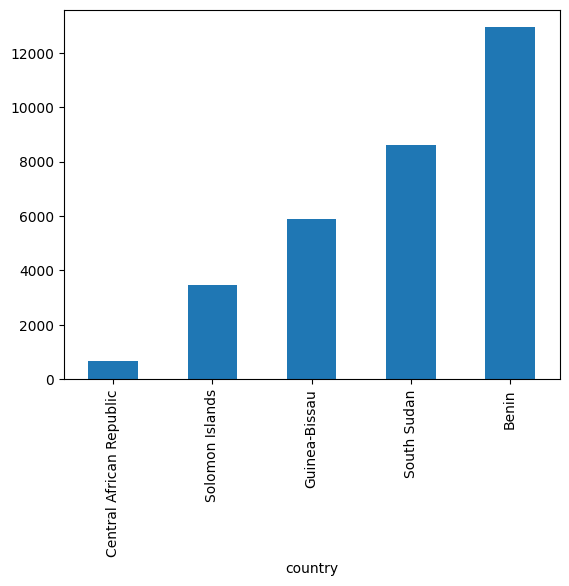

In [126]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [127]:
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recoved_rate
0,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2021-01-01,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-12-31,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-12-31,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-12-31,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-12-31,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:

covid_df.to_csv('covid_df.csv')